In [19]:
# 假设原始 DataFrame 为 df，包含 'generation', 'val_loss' 和 'params' 列
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [20]:
data = pd.read_csv("/Users/zyt/Desktop/DL_finalproject/GeneticResult/genetic_result.csv")


In [21]:
# 将数据转为DataFrame
df = pd.DataFrame(data)

# 解析params列的字符串为字典并展开为DataFrame列
data['params'] = data['params'].apply(lambda x: json.loads(x.replace("'", "\"")))
# 第二步：将字典列展开为独立列
params_df = pd.json_normalize(data['params'])  # 将字典列展开为独立列
data_expanded = pd.concat([data, params_df], axis=1).drop(columns=['params'])  # 合并展开后的列

# 查看结果
print("\n解包后的数据：")
print(data_expanded)


解包后的数据：
     generation  param_index strategy  train_loss  val_loss  train_accuracy  \
0             0            0  genetic    0.362534  0.403079       90.400000   
1             0            1  genetic    1.515163  1.246104       45.333333   
2             0            2  genetic    2.183192  2.116250       16.833333   
3             0            3  genetic    0.536859  0.484606       83.666667   
4             0            4  genetic    1.488111  1.385008       39.266667   
..          ...          ...      ...         ...       ...             ...   
995          19           45  genetic    0.192376  0.348263       93.933333   
996          19           46  genetic    0.186451  0.297545       94.266667   
997          19           47  genetic    0.227640  0.337954       92.933333   
998          19           48  genetic    0.125755  0.284554       96.600000   
999          19           49  genetic    0.162903  0.303281       95.333333   

     val_accuracy  training_time  total_tr

/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_58458/3109724.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="generation", y="val_loss", data=data_expanded, ci=None, marker="o", color="b")


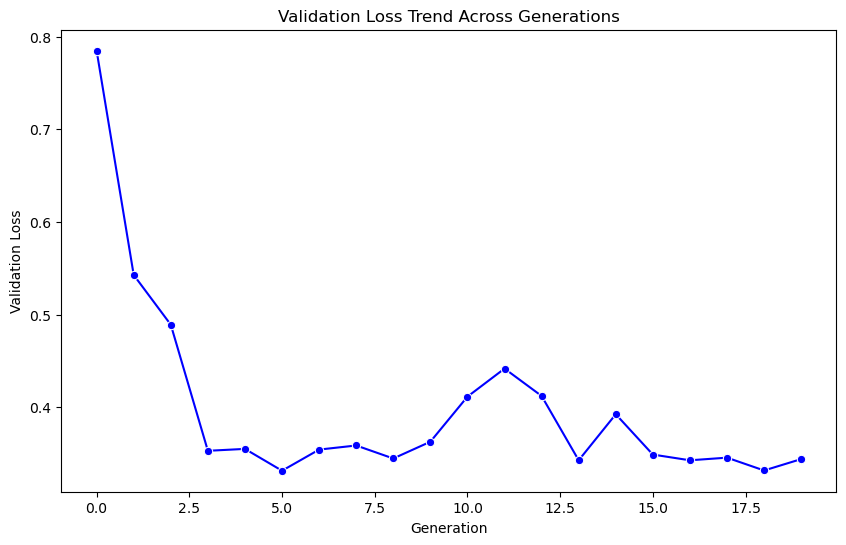

In [25]:
plt.figure(figsize=(10, 6))
sns.lineplot(x="generation", y="val_loss", data=data_expanded, ci=None, marker="o", color="b")
plt.title("Validation Loss Trend Across Generations")
plt.xlabel("Generation")
plt.ylabel("Validation Loss")
plt.show()


/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_58458/3577593011.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x="generation", y="val_loss", data=data_expanded, ci="sd", color="lightblue")


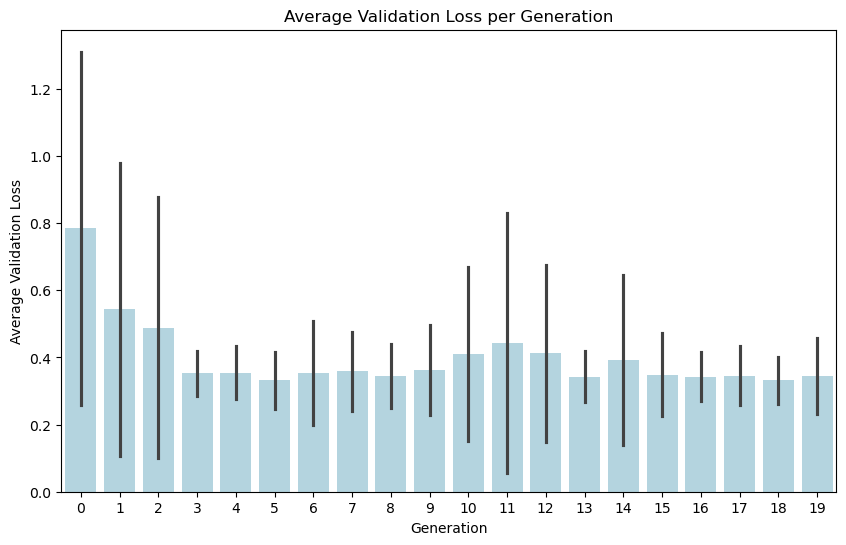

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x="generation", y="val_loss", data=data_expanded, ci="sd", color="lightblue")
plt.title("Average Validation Loss per Generation")
plt.xlabel("Generation")
plt.ylabel("Average Validation Loss")
plt.show()


/var/folders/dz/ffb7x_vj5vl9758_4vqfvj3m0000gn/T/ipykernel_58458/2387891899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="generation", y="val_loss", data=data_expanded, palette="Set3")


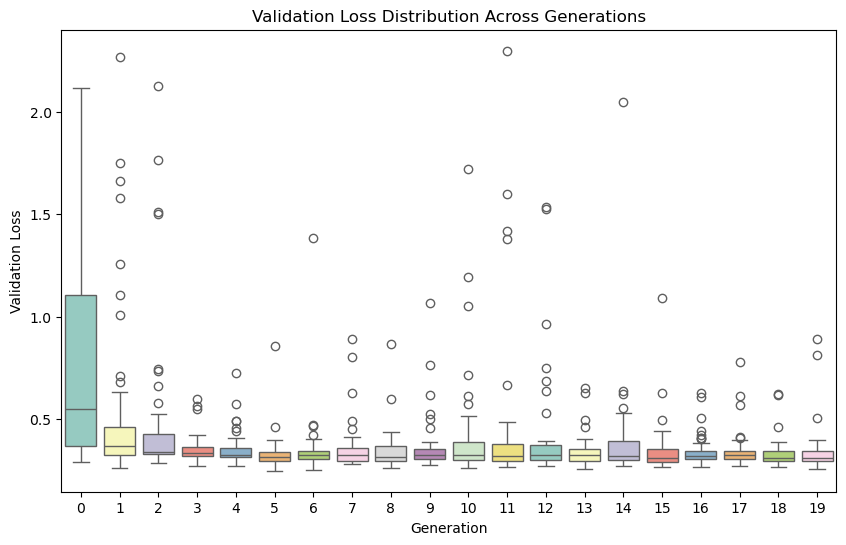

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="generation", y="val_loss", data=data_expanded, palette="Set3")
plt.title("Validation Loss Distribution Across Generations")
plt.xlabel("Generation")
plt.ylabel("Validation Loss")
plt.show()
